## Statististical Analysis for the static homogeneous market data
+ is the data normally distriuted
+ statistical testing
+ summary

In [1]:
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import glob
import os

In [2]:
df = pd.read_csv('dhets_3.csv', names = ['avg_profit1', 'run_n', 'k', 'F'])
df = df.iloc[1: , :]
df.head()

,avg_profit1,run_n,k,F
591.0,286.4,0,4,0.0
412.0,277.4,0,4,0.2
111.0,185.8,0,4,0.4
848.0,413.3,0,4,0.6
85.0,145.9,0,4,0.8


### Normality

In [4]:
#determine the distribution of data within a k or F
#powers of 2 from 4 to 1024 or however much it would be
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
k_range = k_range.astype(int)
#0 to 2 intervals of 0.2
F_range = np.linspace(0.0, 2.0, 10)
for k in k_range:
    statistic, pvalue = stats.shapiro([x['avg_profit1'] for x in df.iloc if x['k'] == str(k)])
    if pvalue < 0.05:
        print("Condition " + "{:}".format(k) + 
              ". We can reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is not normally distributed.")
    else:
        print("Condition " + "{:}".format(k) + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

for f in F_range:
    statistic, pvalue = stats.shapiro([x['avg_profit1'] for x in df.iloc if x['F'] == str(f)[0:3]])
    if pvalue < 0.05:
        print("Condition " + "{:}".format(f) + 
              ". We can reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is not normally distributed.")
    else:
        print("Condition " + "{:}".format(f) + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

Condition 4. We can reject the null hypothesis (p=0.00). Therefore, data is not normally distributed.
Condition 8. We can reject the null hypothesis (p=0.01). Therefore, data is not normally distributed.


/home/karolina/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Condition 16. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 32. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 64. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 128. We can reject the null hypothesis (p=0.00). Therefore, data is not normally distributed.
Condition 256. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 512. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 1024. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 0.0. We can reject the null hypothesis (p=0.00). Therefore, data is not normally distributed.
Condition 0.2222222222222222. We can reject the null hypothesis (p=0.00). Therefore, data is not normally distributed.
Condition 0.4444444444444444. We cannot reject the null h

In [5]:
normal_count = 0
not_normal_count = 0
for k in k_range:
    for f in F_range:
        statistic, pvalue = stats.shapiro([x['avg_profit1'] for x in df.iloc if (x['k'] == str(k) and x['F'] == str(f)[0:3])])
        if pvalue < 0.05:
            print("Condition " + "{:}".format(k) + " " + "{:}".format(str(f)[0:3]) +
                ". We can reject the null hypothesis (p=" + 
                "{:.2f}".format(pvalue) + 
                "). Therefore, data is not normally distributed.")
            not_normal_count = not_normal_count + 1
        else:
            print("Condition " + "{:}".format(k) + " " + "{:}".format(str(f)[0:3]) +
                ". We cannot reject the null hypothesis (p=" + 
                "{:.2f}".format(pvalue) + 
                "). Therefore, data is normally distributed.")
            normal_count = normal_count + 1
print(normal_count)
print(not_normal_count)

Condition 4 0.0. We cannot reject the null hypothesis (p=0.37). Therefore, data is normally distributed.
Condition 4 0.2. We cannot reject the null hypothesis (p=0.15). Therefore, data is normally distributed.
Condition 4 0.4. We cannot reject the null hypothesis (p=0.24). Therefore, data is normally distributed.
Condition 4 0.6. We cannot reject the null hypothesis (p=0.58). Therefore, data is normally distributed.
Condition 4 0.8. We cannot reject the null hypothesis (p=0.35). Therefore, data is normally distributed.
Condition 4 1.1. We cannot reject the null hypothesis (p=0.32). Therefore, data is normally distributed.
Condition 4 1.3. We cannot reject the null hypothesis (p=0.80). Therefore, data is normally distributed.
Condition 4 1.5. We cannot reject the null hypothesis (p=0.30). Therefore, data is normally distributed.
Condition 4 1.7. We cannot reject the null hypothesis (p=1.00). Therefore, data is normally distributed.
Condition 4 2.0. We cannot reject the null hypothesis (

<AxesSubplot:>

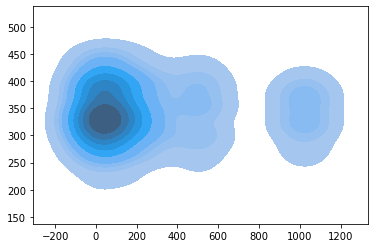

In [31]:
#WRONG! Plot this or the QQ plot
sns.kdeplot(data=df, x=[int(j) for j in df['k']], y=[float(i) for i in df['avg_profit']], fill=True)

### Hypothesis testing

##### ANOVA

In [6]:
by_ks = pd.DataFrame(columns=k_range)
print(by_ks)
temp = []
for i in k_range:
    for x in df.iloc:
        if x['k'] == str(i):
            temp.append(x['avg_profit1'])
    by_ks[i] = temp
    temp = []

by_ks.head()

Empty DataFrame
Columns: [4, 8, 16, 32, 64, 128, 256, 512, 1024]
Index: []


,4,8,16,32,64,128,256,512,1024
0,286.4,229.7,399.2,309.6,241.7,472.7,730.8,436.1,109.8
1,277.4,729.3,148.6,857.5,405.1,358.3,654.4,418.0,288.3
2,185.8,305.5,247.9,443.5,514.2,138.0,203.8,330.9,595.7
3,413.3,420.1,65.5,658.8,503.8,363.6,83.8,179.1,366.3
4,145.9,326.8,633.0,538.8,335.1,135.0,317.1,458.7,378.4


In [7]:
F_range = [float(str(j)[0:3]) for j in F_range]
by_fs = pd.DataFrame(columns=F_range)
print(by_fs)
temp = []
for i in F_range:
    for x in df.iloc:
        if x['F'] == str(i):
            temp.append(x['avg_profit1'])
    by_fs[i] = temp
    temp = []

by_fs.head()

Empty DataFrame
Columns: [0.0, 0.2, 0.4, 0.6, 0.8, 1.1, 1.3, 1.5, 1.7, 2.0]
Index: []


,0.0,0.2,0.4,0.6,0.8,1.1,1.3,1.5,1.7,2.0
0,286.4,277.4,185.8,413.3,145.9,401.6,448.3,383.5,290.3,116.0
1,229.7,729.3,305.5,420.1,326.8,232.5,324.7,307.7,346.7,234.7
2,399.2,148.6,247.9,65.5,633.0,446.6,132.5,254.5,440.1,716.6
3,309.6,857.5,443.5,658.8,538.8,183.8,279.9,116.3,321.4,424.3
4,241.7,405.1,514.2,503.8,335.1,414.0,254.8,499.7,250.9,238.8


In [7]:

statistic, pvalue = stats.f_oneway(by_ks[4], by_ks[8],by_ks[16],by_ks[32], by_ks[64], by_ks[128], by_ks[256], by_ks[512], by_ks[1024])
if pvalue < 0.05:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

ANOVA: (p=0.71 > 0.05). Cannot reject null hypothesis that groups have same population mean.


In [8]:

statistic, pvalue = stats.f_oneway(by_fs[0.0], by_fs[0.2], by_fs[0.4], by_fs[0.6], by_fs[0.8], by_fs[1.1], by_fs[1.3], by_fs[1.5], by_fs[1.7], by_fs[2.0])
if pvalue < 0.05:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

ANOVA: (p=0.67 > 0.05). Cannot reject null hypothesis that groups have same population mean.


##### Kruskal-Wallis

In [8]:
statistics, pvalue = stats.kruskal(by_ks[4], by_ks[8],by_ks[16],by_ks[32], by_ks[64], by_ks[128], by_ks[256], by_ks[512], by_ks[1024])
if pvalue < 0.05:
    print("KW: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("KW: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

KW: (p=0.73 > 0.05). Cannot reject null hypothesis that groups have same population mean.


In [9]:
statistics, pvalue =  stats.kruskal(by_fs[0.0], by_fs[0.2], by_fs[0.4], by_fs[0.6], by_fs[0.8], by_fs[1.1], by_fs[1.3], by_fs[1.5], by_fs[1.7], by_fs[2.0])
if pvalue < 0.05:
    print("KW: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("KW: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

KW: (p=0.74 > 0.05). Cannot reject null hypothesis that groups have same population mean.
